# BUAL 5660 Predictive Modeling II Final Project
## 2018-2019 NCAA Men's Basketball Season Tournament Prediction


In [2]:
#Load packages needed
import numpy as np 
import pandas as pd
import os
import pdpbox
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

### 2. Variable description

In [3]:
training_set = pd.read_csv('training_set.csv')
training_set.describe()

,Unnamed: 0,Result,Season,Team1,Team2,deltaSeed,deltaMO,deltaWinPct,deltaPointsFor,deltaPointsAgainst,...,deltaOR,deltaDR,deltaAst,deltaTO,deltaStl,deltaBlk,deltaPF,deltaFGA3Prct,delta_coachexp,delta_coachexpteam
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,...,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,523.500000,0.477099,2010.591603,1292.479008,1297.645038,0.165076,0.532697,-0.004617,0.042654,0.206121,...,-0.069122,-0.082926,0.119288,0.025300,0.117047,-0.003261,-0.109600,0.206121,-0.065840,0.265267
std,302.675844,0.499714,4.611062,102.127042,106.528175,7.470441,67.666098,0.143627,7.282903,6.425990,...,2.565056,2.495786,2.561843,2.084982,1.839276,1.878719,2.557773,6.425990,11.454509,10.645107
min,0.000000,0.000000,2003.000000,1103.000000,1102.000000,-15.000000,-289.861905,-0.491657,-21.173797,-19.145650,...,-7.723077,-9.010776,-8.363636,-7.666667,-6.090133,-5.800000,-7.896552,-19.145650,-30.000000,-32.000000
25%,261.750000,0.000000,2007.000000,1211.000000,1211.000000,-5.000000,-24.920673,-0.099432,-4.842127,-4.031281,...,-1.708779,-1.679829,-1.610770,-1.277730,-1.035012,-1.255699,-1.918672,-4.031281,-8.000000,-7.000000
50%,523.500000,0.000000,2011.000000,1282.500000,1292.000000,0.000000,1.000000,-0.001849,-0.270399,0.079187,...,0.076588,-0.114360,0.188263,-0.029857,0.125887,-0.004812,-0.231128,0.079187,0.000000,0.000000
75%,785.250000,1.000000,2015.000000,1387.000000,1397.750000,5.000000,27.525000,0.086199,4.833111,4.785763,...,1.664536,1.608902,1.947017,1.424749,1.378311,1.127203,1.623374,4.785763,8.000000,7.000000
max,1047.000000,1.000000,2018.000000,1462.000000,1463.000000,15.000000,249.666667,0.633333,22.892857,25.035714,...,9.214286,9.285714,9.220143,7.580645,6.283681,6.752688,7.256303,25.035714,33.000000,33.000000


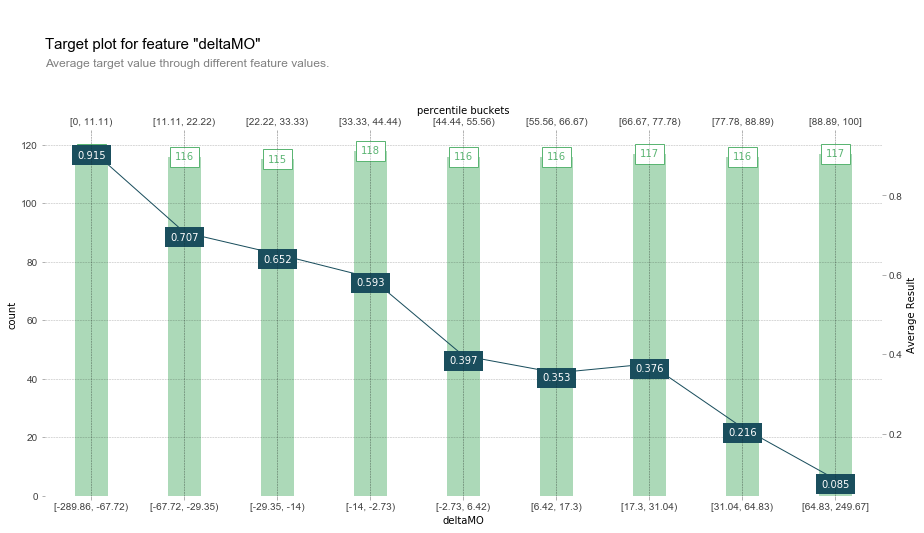

In [4]:
# Reference : https://buildmedia.readthedocs.org/media/pdf/pdpbox/latest/pdpbox.pdf
%matplotlib inline

from pdpbox import info_plots, get_dataset
fig, axes, summary_df = info_plots.target_plot(df=training_set, feature='deltaMO', feature_name='deltaMO',target='Result', show_percentile=True)

# the plot below suggest that if team 1 is ranked higher (small Massey Ordinal) than team2 in Massey ratings, the higher the winning chance

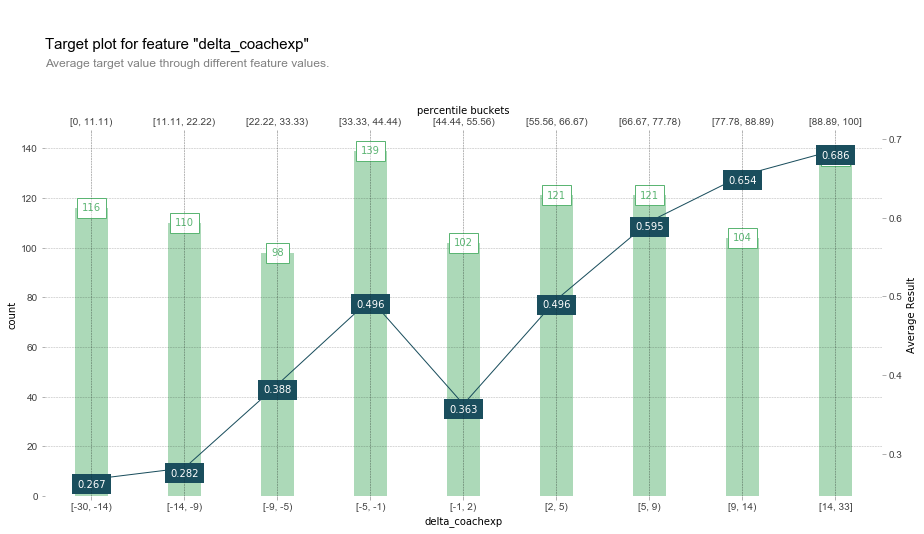

In [5]:
from pdpbox import info_plots, get_dataset
fig, axes, summary_df = info_plots.target_plot(df=training_set, feature='delta_coachexp', feature_name='delta_coachexp',target='Result', show_percentile=True)

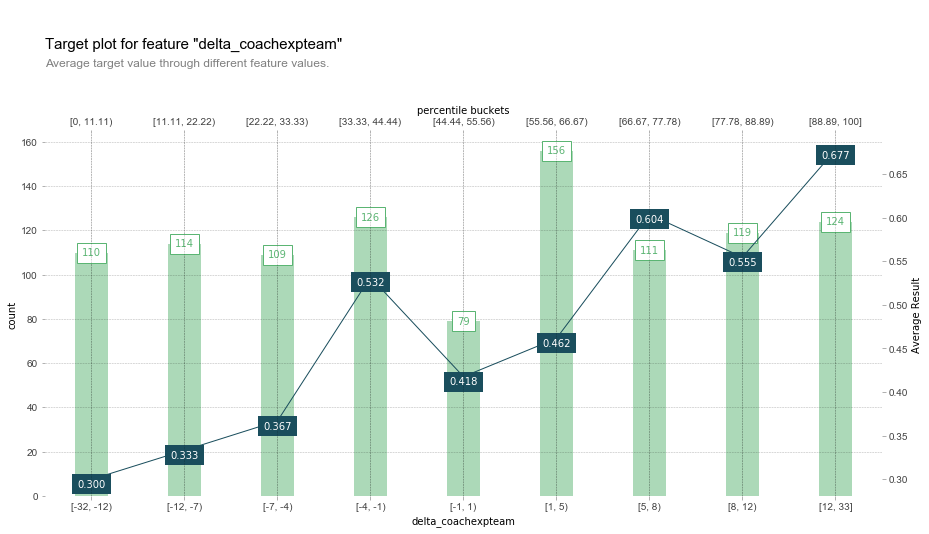

In [6]:
from pdpbox import info_plots, get_dataset
fig, axes, summary_df = info_plots.target_plot(df=training_set, feature='delta_coachexpteam', feature_name='delta_coachexpteam',target='Result', show_percentile=True)

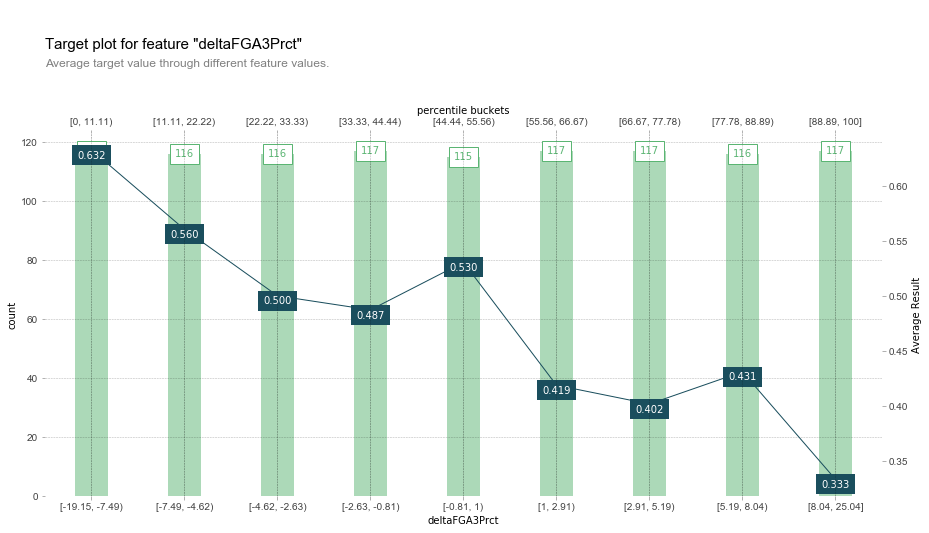

In [7]:
from pdpbox import info_plots, get_dataset
fig, axes, summary_df = info_plots.target_plot(df=training_set, feature='deltaFGA3Prct', feature_name='deltaFGA3Prct',target='Result', show_percentile=True)

# 3. model 

In [8]:
training_set.columns

Index(['Unnamed: 0', 'Result', 'Season', 'Team1', 'Team2', 'deltaSeed',
       'deltaMO', 'deltaWinPct', 'deltaPointsFor', 'deltaPointsAgainst',
       'deltaFGM', 'deltaFGA', 'deltaFGM3', 'deltaFGA3', 'deltaFTM',
       'deltaFTA', 'deltaOR', 'deltaDR', 'deltaAst', 'deltaTO', 'deltaStl',
       'deltaBlk', 'deltaPF', 'deltaFGA3Prct', 'delta_coachexp',
       'delta_coachexpteam'],
      dtype='object')

In [9]:
# split the dataset for cross validation
X = training_set.drop(['Result', 'Season', 'Team1', 'Team2'], axis=1)
y = training_set.Result

X_columns = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [10]:
prediction = dict()

In [16]:
# 1. build a decision tree model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1, max_depth =4)
tree.fit(X_train, y_train)
prediction['decision_tree'] = clf.predict(X_test)


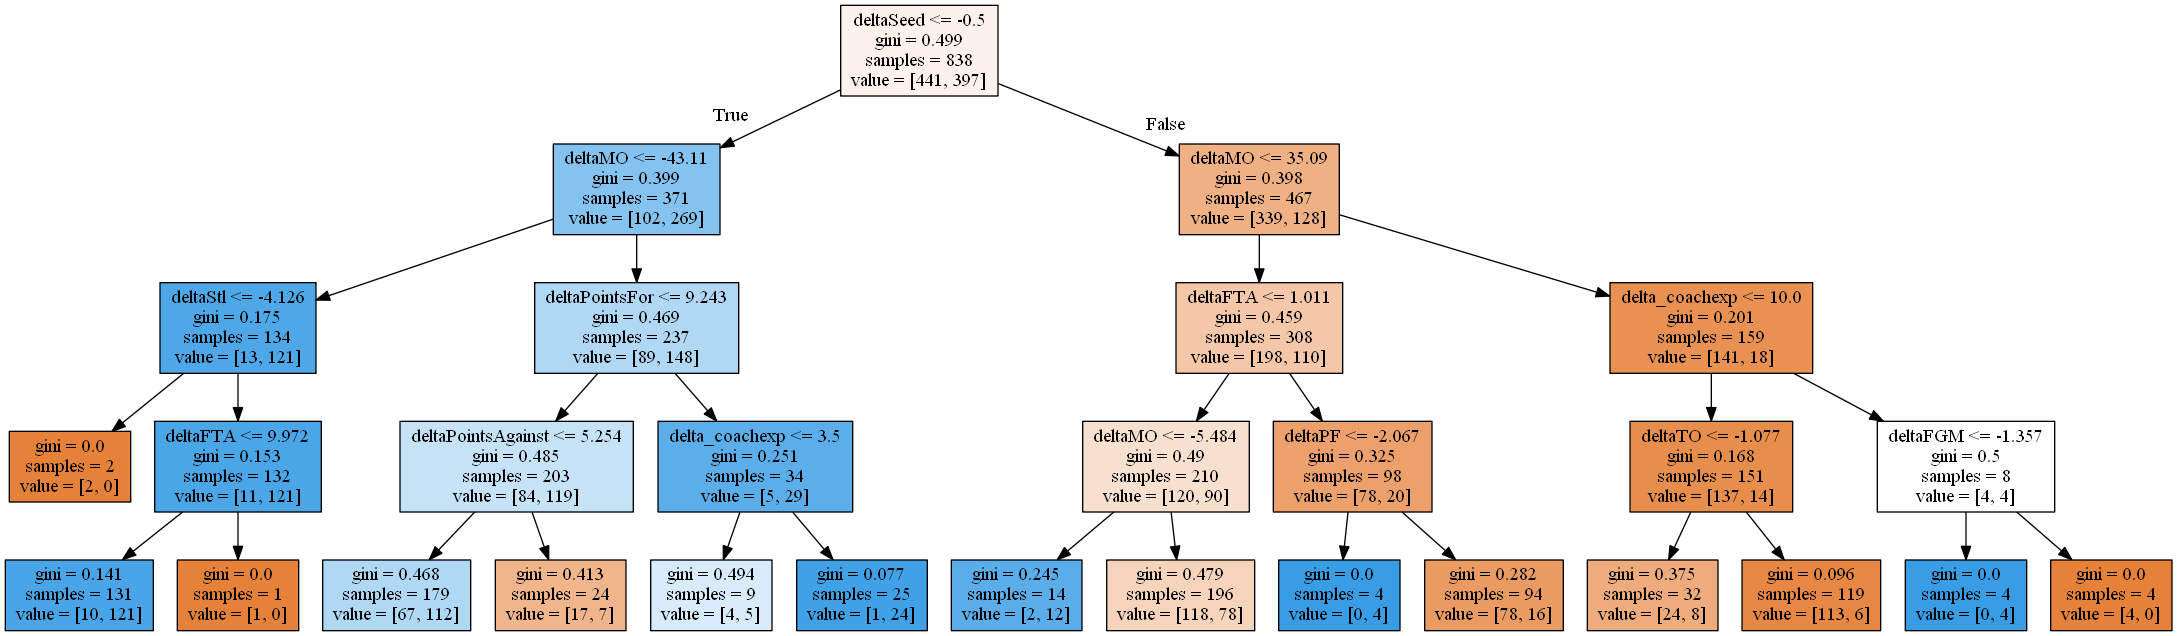

In [17]:
# Print the tree image
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)


graph = print_tree(tree, features= X.columns)
graph.write_png("tree.png")
Image(graph.create_png())

In [18]:
# 1.model evaluation 1: confusion matrix for decision tree model
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, prediction['decision_tree']).ravel()
print(confusion_matrix(y_test, prediction['decision_tree']))

[[74 33]
 [33 70]]


In [19]:
# model evaluation 2: Accuracy, sensitivity & specificty
print("Accuracy = %s" %((tp+tn)/(tp+fn+tn+fp)))
print("Sensitivity = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))
print("Precision = %s" %(tp/(tp+fp)))


Accuracy = 0.6857142857142857
Sensitivity = 0.6796116504854369
Specificity = 0.6915887850467289
Precision = 0.6796116504854369


In [20]:
# model evaluation 3: precision & recall & F1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print(classification_report(y_test, prediction['decision_tree']))


              precision    recall  f1-score   support

           0       0.69      0.69      0.69       107
           1       0.68      0.68      0.68       103

    accuracy                           0.69       210
   macro avg       0.69      0.69      0.69       210
weighted avg       0.69      0.69      0.69       210



AUC= 0.7235278105435079


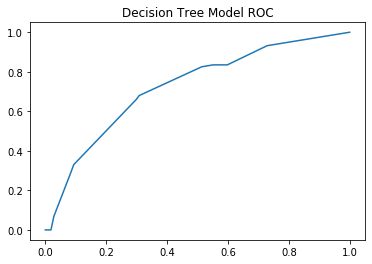

In [21]:
# model evaluation 4: ROC and AUC
# generate the predicted probability

clfy_pred_prob = clf.predict_proba(X_test)[:,1]
print("AUC=", roc_auc_score(y_test, clfy_pred_prob))

# plot ROC
plt.title('Decision Tree Model ROC')
fpr, tpr, thresholds = metrics.roc_curve(y_test, clfy_pred_prob)
plt.plot(fpr, tpr)

In [24]:
# 2. build random forest model
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import accuracy_score
# play around with the setting for max_features
for i in range(1, 22):
    rfc2 = RandomForestClassifier(max_features=i, random_state=1)
    rfc2.fit(X_train, y_train)
    pred2 = rfc2.predict(X_test)
    print("Accuracy for %s feature(s) equals %s" %(i, accuracy_score(y_test, pred2)))

C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Accuracy for 1 feature(s) equals 0.638095238095238
Accuracy for 2 feature(s) equals 0.5952380952380952
Accuracy for 3 feature(s) equals 0.6761904761904762
Accuracy for 4 feature(s) equals 0.6666666666666666
Accuracy for 5 feature(s) equals 0.6047619047619047
Accuracy for 6 feature(s) equals 0.5857142857142857
Accuracy for 7 feature(s) equals 0.6523809523809524
Accuracy for 8 feature(s) equals 0.6476190476190476
Accuracy for 9 feature(s) equals 0.6190476190476191
Accuracy for 10 feature(s) equals 0.6428571428571429
Accuracy for 11 feature(s) equals 0.6142857142857143
Accuracy for 12 feature(s) equals 0.6571428571428571


C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Accuracy for 13 feature(s) equals 0.6428571428571429
Accuracy for 14 feature(s) equals 0.6476190476190476
Accuracy for 15 feature(s) equals 0.6523809523809524
Accuracy for 16 feature(s) equals 0.6095238095238096


C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy for 17 feature(s) equals 0.6571428571428571
Accuracy for 18 feature(s) equals 0.6285714285714286
Accuracy for 19 feature(s) equals 0.6476190476190476


C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy for 20 feature(s) equals 0.5904761904761905
Accuracy for 21 feature(s) equals 0.6523809523809524


C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
#fit the rf model
rfc = RandomForestClassifier(max_features=3, random_state=1)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
prediction['Random_Forest'] = rfc.predict(X_test)

C:\Users\xzw00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [26]:
from sklearn.metrics import accuracy_score
print('Random Forest accuracy =', accuracy_score(y_test, prediction['Random_Forest']))

Random Forest accuracy = 0.6761904761904762


[[80 27]
 [41 62]]
Accuracy = 0.6761904761904762
Sensitivity = 0.6019417475728155
Specificity = 0.7476635514018691
Precision = 0.6966292134831461
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       107
           1       0.70      0.60      0.65       103

    accuracy                           0.68       210
   macro avg       0.68      0.67      0.67       210
weighted avg       0.68      0.68      0.67       210

AUC= 0.7450322112331005


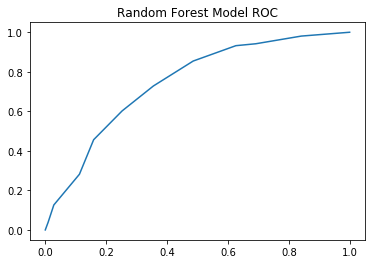

In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

#3. model evaluation 1: confusion matrix for random forest model
tn, fp, fn, tp = confusion_matrix(y_test, prediction['Random_Forest']).ravel()
print(confusion_matrix(y_test, prediction['Random_Forest']))

# model evaluation 2: Accuracy, sensitivity & specificty
print("Accuracy = %s" %((tp+tn)/(tp+fn+tn+fp)))
print("Sensitivity = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))
print("Precision = %s" %(tp/(tp+fp)))

# model evaluation 3: precision & recall & F1_score
print(classification_report(y_test, prediction['Random_Forest']))

# model evaluation 4: ROC and AUC
# generate the predicted probability
rfcy_pred_prob = rfc.predict_proba(X_test)[:,1]
print("AUC=", roc_auc_score(y_test, rfcy_pred_prob))

# plot ROC
plt.title('Random Forest Model ROC')
fpr, tpr, thresholds = metrics.roc_curve(y_test, rfcy_pred_prob)
plt.plot(fpr, tpr)

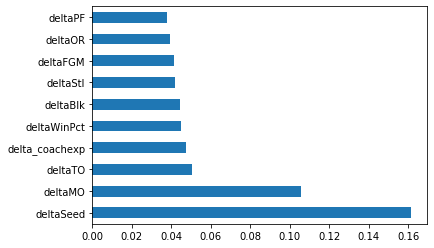

In [28]:
# plot the important features
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

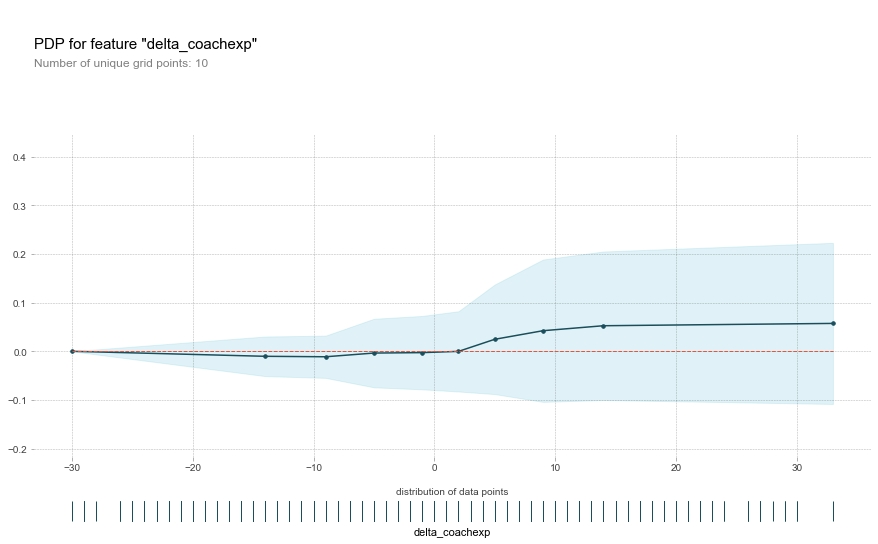

In [29]:
# https://pdpbox.readthedocs.io/en/latest/

from pdpbox.pdp import pdp_isolate, pdp_plot
pdp_delta_coachexp = pdp_isolate(model=rfc, dataset=training_set, model_features=X_columns,feature='delta_coachexp')
fig, axes = pdp_plot(pdp_isolate_out=pdp_delta_coachexp,feature_name='delta_coachexp',plot_pts_dist=True)

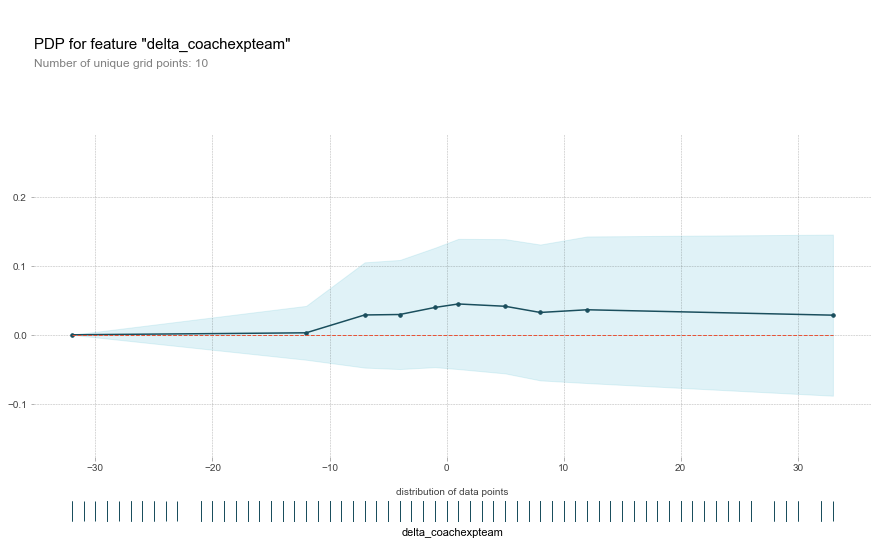

In [30]:
from pdpbox.pdp import pdp_isolate, pdp_plot
pdp_delta_coachexpteam = pdp_isolate(model=rfc, dataset=training_set, model_features=X_columns,feature='delta_coachexpteam')
fig, axes = pdp_plot(pdp_isolate_out=pdp_delta_coachexpteam,feature_name='delta_coachexpteam',plot_pts_dist=True)

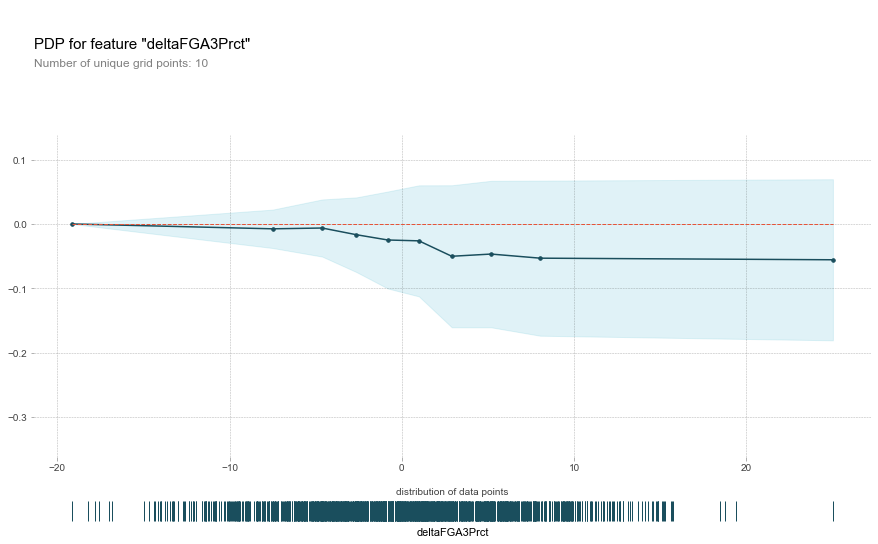

In [31]:
from pdpbox.pdp import pdp_isolate, pdp_plot
pdp_delta_FGA3Prct = pdp_isolate(model=rfc, dataset=training_set, model_features=X_columns,feature='deltaFGA3Prct')
fig, axes = pdp_plot(pdp_isolate_out=pdp_delta_FGA3Prct,feature_name='deltaFGA3Prct',plot_pts_dist=True)

In [32]:
#3. Logistic Regression
import statsmodels.api as sm
X_const = sm.add_constant(X_train)
logit = sm.Logit(y_train, X_const)

In [33]:
from sklearn.linear_model import LogisticRegression

# build the logit regression model, using the training dataset
logreg = LogisticRegression(fit_intercept=False)
logreg.fit(X_train, y_train)

# generate prediction for the test dataset
y_pred_logit = logreg.predict(X_test)

prediction['logit'] = logreg.predict(X_test)
logreg.coef_

array([[-2.63718956e-04, -9.39537926e-02, -7.09181975e-03,
        -4.90629156e-01,  9.37306717e-02, -4.31675094e-02,
         1.39291669e-01, -3.91881353e-02, -3.02476332e-01,
         1.11499140e-01,  1.17623665e-01, -1.58923880e-01,
         9.79710339e-02, -1.12956231e-01, -1.09470013e-01,
         3.72971566e-02,  3.11876999e-02,  1.36354604e-02,
        -6.14640268e-02, -4.31675094e-02,  3.58406224e-03,
         3.07478608e-03]])

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e8)
results = model.fit(X_train, y_train)
print(results.coef_)
print(results.intercept_)

[[-2.27270007e-04 -9.66535564e-02 -6.91020570e-03 -1.16920969e+00
   1.03391007e-01 -4.89511875e-02  1.50549633e-01 -4.44788577e-02
  -3.22091583e-01  1.20481125e-01  1.24383323e-01 -1.60976607e-01
   9.96883553e-02 -1.12482204e-01 -1.11618435e-01  3.63265334e-02
   3.30495562e-02  1.10733842e-02 -6.46797920e-02 -4.89511875e-02
   2.86837595e-03  3.33764867e-03]]
[-0.02838395]


In [35]:
import statsmodels.discrete.discrete_model as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit = sm.Logit(y_train, X_train)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.517152
         Iterations 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                  838
Model:                          Logit   Df Residuals:                      818
Method:                           MLE   Df Model:                           19
Date:                Mon, 02 Dec 2019   Pseudo R-squ.:                  0.2524
Time:                        22:28:25   Log-Likelihood:                -433.37
converged:                       True   LL-Null:                       -579.70
Covariance Type:            nonrobust   LLR p-value:                 6.382e-51
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Unnamed: 0            -0.0003      0.000     -1.895      0.058      -0.001    9.21e-06
deltaSeed             -0.0966      0.028     -3.511      0.000      -0.151      -0.043
deltaMO               -0.0069      0.004     -1.682      0.093      -0.015       0.001
deltaWinPct           -1.1711      1.168     -1.003      0.316      -3.460       1.118
deltaPointsFor         0.1036        nan        nan        nan         nan         nan
deltaPointsAgainst    -0.0491        nan        nan        nan         nan         nan
deltaFGM               0.1504        nan        nan        nan         nan         nan
deltaFGA              -0.0442      0.073     -0.608      0.543      -0.187       0.098
deltaFGM3             -0.3214      0.132     -2.440      0.015      -0.580      -0.063
deltaFGA3              0.1200      0.069      1.743      0.081      -0.015       0.255
deltaFTM               0.1241        nan        nan        nan         nan         nan
deltaFTA              -0.1607      0.074     -2.175      0.030      -0.306      -0.016
deltaOR                0.0995      0.082      1.214      0.225      -0.061       0.260
deltaDR               -0.1125      0.063     -1.793      0.073      -0.236       0.011
deltaAst              -0.1118      0.051     -2.194      0.028      -0.212      -0.012
deltaTO                0.0360      0.078      0.459      0.646      -0.118       0.189
deltaStl               0.0325      0.077      0.421      0.674      -0.119       0.184
deltaBlk               0.0104      0.058      0.180      0.857      -0.103       0.124
deltaPF               -0.0644      0.044     -1.452      0.147      -0.151       0.023
deltaFGA3Prct         -0.0491        nan        nan        nan         nan         nan
delta_coachexp         0.0030      0.011      0.276      0.782      -0.018       0.024
delta_coachexpteam     0.0033      0.011      0.301      0.763      -0.018       0.025
======================================================================================
"""

[[77 30]
 [38 65]]
Accuracy = 0.6761904761904762
Sensitivity = 0.6310679611650486
Specificity = 0.719626168224299
Precision = 0.6842105263157895
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       107
           1       0.68      0.63      0.66       103

    accuracy                           0.68       210
   macro avg       0.68      0.68      0.68       210
weighted avg       0.68      0.68      0.68       210

AUC= 0.7554668360402867


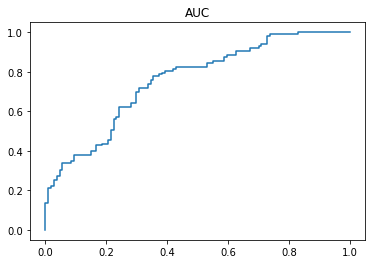

In [36]:
# 3.model evaluation 1: confusion matrix for logist regression 

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_logit).ravel()
print(confusion_matrix(y_test, y_pred_logit))

# model evaluation 2: Accuracy, sensitivity & specificty
print("Accuracy = %s" %((tp+tn)/(tp+fn+tn+fp)))
print("Sensitivity = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))
print("Precision = %s" %(tp/(tp+fp)))

# model evaluation 3: precision & recall & F1_score
print(classification_report(y_test, y_pred_logit))

# model evaluation 4: ROC and AUC
# generate the predicted probability
y_pred_prob = logreg.predict_proba(X_test)[:,1]
print("AUC=", roc_auc_score(y_test, y_pred_prob))

# plot ROC
plt.title('AUC')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)

In [37]:
#4. knn
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)  
prediction['knn'] = knn.predict(X_test)

print('KNN accuracy =', accuracy_score(y_test, prediction['knn']))


KNN accuracy = 0.6571428571428571


In [38]:
# model evaluation 1: confusion matrix for knn
tn, fp, fn, tp = confusion_matrix(y_test, prediction['knn']).ravel()
print(confusion_matrix(y_test, prediction['knn']))

# model evaluation 2: Accuracy, sensitivity & specificty
print("Accuracy = %s" %((tp+tn)/(tp+fn+tn+fp)))
print("Sensitivity = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))
print("Precision = %s" %(tp/(tp+fp)))

# model evaluation 3: precision & recall & F1_score
print(classification_report(y_test, prediction['knn']))



[[76 31]
 [41 62]]
Accuracy = 0.6571428571428571
Sensitivity = 0.6019417475728155
Specificity = 0.7102803738317757
Precision = 0.6666666666666666
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       107
           1       0.67      0.60      0.63       103

    accuracy                           0.66       210
   macro avg       0.66      0.66      0.66       210
weighted avg       0.66      0.66      0.66       210



AUC= 0.6561110607022956


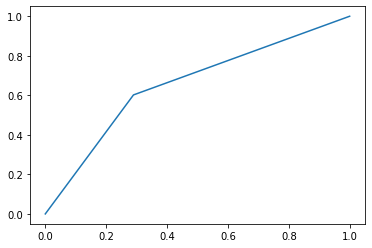

In [39]:
# model evaluation 4: ROC and AUC
prediction['knn'] = knn.predict(X_test)
print("AUC=", roc_auc_score(y_test, prediction['knn']))

# plot ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction['knn'])
plt.plot(fpr, tpr)


In [40]:
#5. Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb1 = GaussianNB()
nb1.fit(X_train, y_train)
prediction['Naive_Bayes'] = nb1.predict(X_test)

[[71 36]
 [34 69]]
Accuracy = 0.6666666666666666
Sensitivity = 0.6699029126213593
Specificity = 0.6635514018691588
Precision = 0.6571428571428571
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       107
           1       0.66      0.67      0.66       103

    accuracy                           0.67       210
   macro avg       0.67      0.67      0.67       210
weighted avg       0.67      0.67      0.67       210

nb= 0.6667271572452591


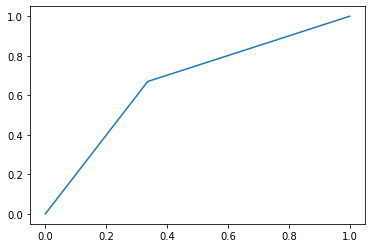

In [41]:
# model evaluation 1: confusion matrix for Naive Bayes

tn, fp, fn, tp = confusion_matrix(y_test, prediction['Naive_Bayes']).ravel()
print(confusion_matrix(y_test, prediction['Naive_Bayes']))

# model evaluation 2: Accuracy, sensitivity & specificty
print("Accuracy = %s" %((tp+tn)/(tp+fn+tn+fp)))
print("Sensitivity = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))
print("Precision = %s" %(tp/(tp+fp)))

# model evaluation 3: precision & recall & F1_score
print(classification_report(y_test, prediction['Naive_Bayes']))

# model evaluation 4: ROC and AUC
# generate the predicted probability
prediction['Naive_Bayes'] = nb1.predict(X_test)
print("nb=", roc_auc_score(y_test, prediction['Naive_Bayes']))

# plot ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction['Naive_Bayes'])
plt.plot(fpr, tpr)


In [42]:
#6. Neural Network 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_nn = scaler.transform(X_train)
X_test_nn = scaler.transform(X_test)

In [43]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5))
mlp.fit(X_train_nn,y_train)

prediction['Neural_Network_MLP'] = mlp.predict(X_test)

[[33 74]
 [10 93]]
Accuracy = 0.6
Sensitivity = 0.9029126213592233
Specificity = 0.308411214953271
Precision = 0.5568862275449101
              precision    recall  f1-score   support

           0       0.77      0.31      0.44       107
           1       0.56      0.90      0.69       103

    accuracy                           0.60       210
   macro avg       0.66      0.61      0.56       210
weighted avg       0.66      0.60      0.56       210

mlp= 0.6178658923872606


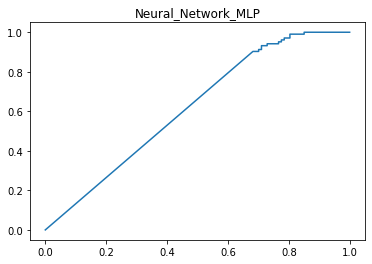

In [44]:
tn, fp, fn, tp = confusion_matrix(y_test, prediction['Neural_Network_MLP']).ravel()
print(confusion_matrix(y_test, prediction['Neural_Network_MLP']))

# model evaluation 2: Accuracy, sensitivity & specificty
print("Accuracy = %s" %((tp+tn)/(tp+fn+tn+fp)))
print("Sensitivity = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))
print("Precision = %s" %(tp/(tp+fp)))

# model evaluation 3: precision & recall & F1_score
print(classification_report(y_test, prediction['Neural_Network_MLP']))

# model evaluation 4: ROC and AUC
# generate the predicted probability
mlpy_pred_prob = mlp.predict_proba(X_test)[:,1]
print("mlp=", roc_auc_score(y_test,mlpy_pred_prob))

# plot ROC
plt.title('Neural_Network_MLP')
fpr, tpr, thresholds = metrics.roc_curve(y_test,mlpy_pred_prob)
plt.plot(fpr, tpr)


In [45]:
#7. support vector machine 
from sklearn.svm import SVC

svc = SVC(C= 1.0, kernel='linear')
svc.fit(X_train, y_train)

prediction['Support_vector_machine'] = svc.predict(X_test)

[[80 27]
 [44 59]]
Accuracy = 0.6619047619047619
Sensitivity = 0.5728155339805825
Specificity = 0.7476635514018691
Precision = 0.686046511627907
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       107
           1       0.69      0.57      0.62       103

    accuracy                           0.66       210
   macro avg       0.67      0.66      0.66       210
weighted avg       0.67      0.66      0.66       210

AUC= 0.6178658923872606


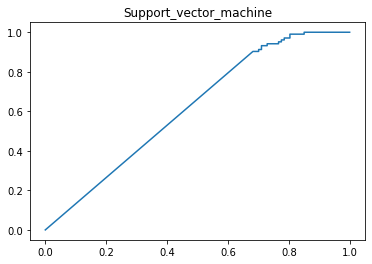

In [46]:
# model evaluation 1: confusion matrix for vector machine

tn, fp, fn, tp = confusion_matrix(y_test, prediction['Support_vector_machine']).ravel()
print(confusion_matrix(y_test, prediction['Support_vector_machine']))

# model evaluation 2: Accuracy, sensitivity & specificty
print("Accuracy = %s" %((tp+tn)/(tp+fn+tn+fp)))
print("Sensitivity = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))
print("Precision = %s" %(tp/(tp+fp)))


# model evaluation 3: precision & recall & F1_score
print(classification_report(y_test, prediction['Support_vector_machine']))

# model evaluation 4: ROC and AUC
# generate the predicted probability
svcy_pred_prob = mlp.predict_proba(X_test)[:,1]
print("AUC=", roc_auc_score(y_test, svcy_pred_prob))

# plot ROC
plt.title('Support_vector_machine')
fpr, tpr, thresholds = metrics.roc_curve(y_test, svcy_pred_prob)
plt.plot(fpr, tpr)



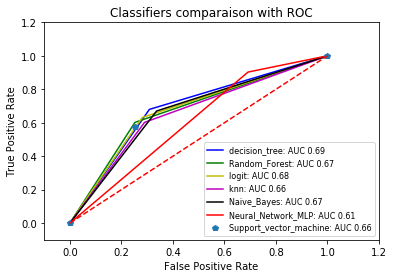

In [50]:
# Model comparison
from sklearn.metrics import roc_curve, auc
cmp = 0
colors = ['b', 'g', 'y', 'm', 'k', 'r', 'p','c']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

params = {'legend.fontsize': 8,
          'legend.handlelength': 2}
plt.rcParams.update(params)

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()